In [385]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import seaborn as sns

%matplotlib inline

In [368]:
beer = pd.read_csv("data/beer.csv")
umcsent = pd.read_csv("data/umcsent.csv")

## UMCSENT data preprocessing

In [369]:
umcsent.head()

,DATE,UMCSENT
0,1952-11-01,86.2
1,1952-12-01,.
2,1953-01-01,.
3,1953-02-01,90.7
4,1953-03-01,.


In [370]:
#set date as the index
umcsent.index = pd.to_datetime(umcsent['DATE'])
umcsent.drop(["DATE"], axis=1, inplace=True)
umcsent['quarter'] = umcsent.index.quarter
umcsent['year'] = umcsent.index.year

In [371]:
#select date from 1978 and onwards
umcsent = umcsent.loc[(umcsent.index >= '1978-01-01') & (umcsent.index < '2010-01-01')]
umcsent["UMCSENT"] = umcsent["UMCSENT"].astype(float)

In [372]:
#quarterly data
umcsent = umcsent.groupby(["year", "quarter"]).sum().reset_index();umcsent

,year,quarter,UMCSENT
0,1978,1,246.8
1,1978,2,244.5
2,1978,3,241.2
3,1978,4,220.4
4,1979,1,214.4
...,...,...,...
123,2008,4,173.0
124,2009,1,174.8
125,2009,2,204.6
126,2009,3,205.2


<AxesSubplot:>

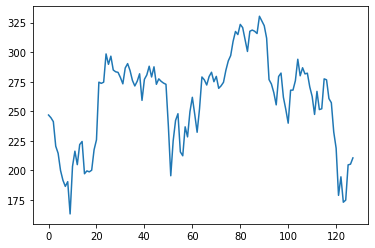

In [373]:
umcsent["UMCSENT"].plot()

In [374]:
umcsent.shape

(128, 3)

## Beer data preprocessing

In [375]:
beer.head()

,Time,Year,Quarter,Beer.Production
0,1,1956,Q1,284
1,2,1956,Q2,213
2,3,1956,Q3,227
3,4,1956,Q4,308
4,5,1957,Q1,262


In [376]:
beer["Year"] = beer["Year"].astype(int)

In [377]:
beer = beer[(beer.Year > 1977) & (beer.Year < 2010)]
beer = beer.reset_index()

<AxesSubplot:>

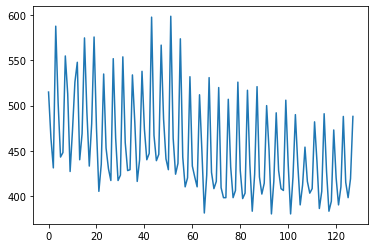

In [378]:
beer["Beer.Production"].plot()

In [379]:
beer

,index,Time,Year,Quarter,Beer.Production
0,88,89,1978,Q1,515
1,89,90,1978,Q2,464
2,90,91,1978,Q3,431
3,91,92,1978,Q4,588
4,92,93,1979,Q1,503
...,...,...,...,...,...
123,211,212,2008,Q4,488
124,212,213,2009,Q1,415
125,213,214,2009,Q2,398
126,214,215,2009,Q3,419


## Create new dataframe

In [380]:
df = pd.concat([beer["Beer.Production"], umcsent["UMCSENT"]], axis=1)
df.columns = ["beer", "umcsent"]

In [381]:
df

,beer,umcsent
0,515,246.8
1,464,244.5
2,431,241.2
3,588,220.4
4,503,214.4
...,...,...
123,488,173.0
124,415,174.8
125,398,204.6
126,419,205.2


In [430]:
def tsplot2(y, title, lags=None, figsize=(20,10)):
    """
    Examine the patterns of the ACF, PACF, along with the time series plot and histogram
    """
    fig, ax = plt.subplots(2,2, figsize=figsize)
    
    #ts ax
    ax[0][0].plot(y)
    ax[0][0].set_title(title)
    
    #hist ax
    ax[0][1].hist(y, bins=25)
    ax[0][1].set_title("Histogram")
    
    #acf
    sm.graphics.tsa.plot_acf(y, ax=ax[1][0])
    
    #pacf
    sm.graphics.tsa.plot_pacf(y, ax=ax[1][1])
    
    plt.tight_layout()

D:\anaconda3\envs\time-series-tutorials\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


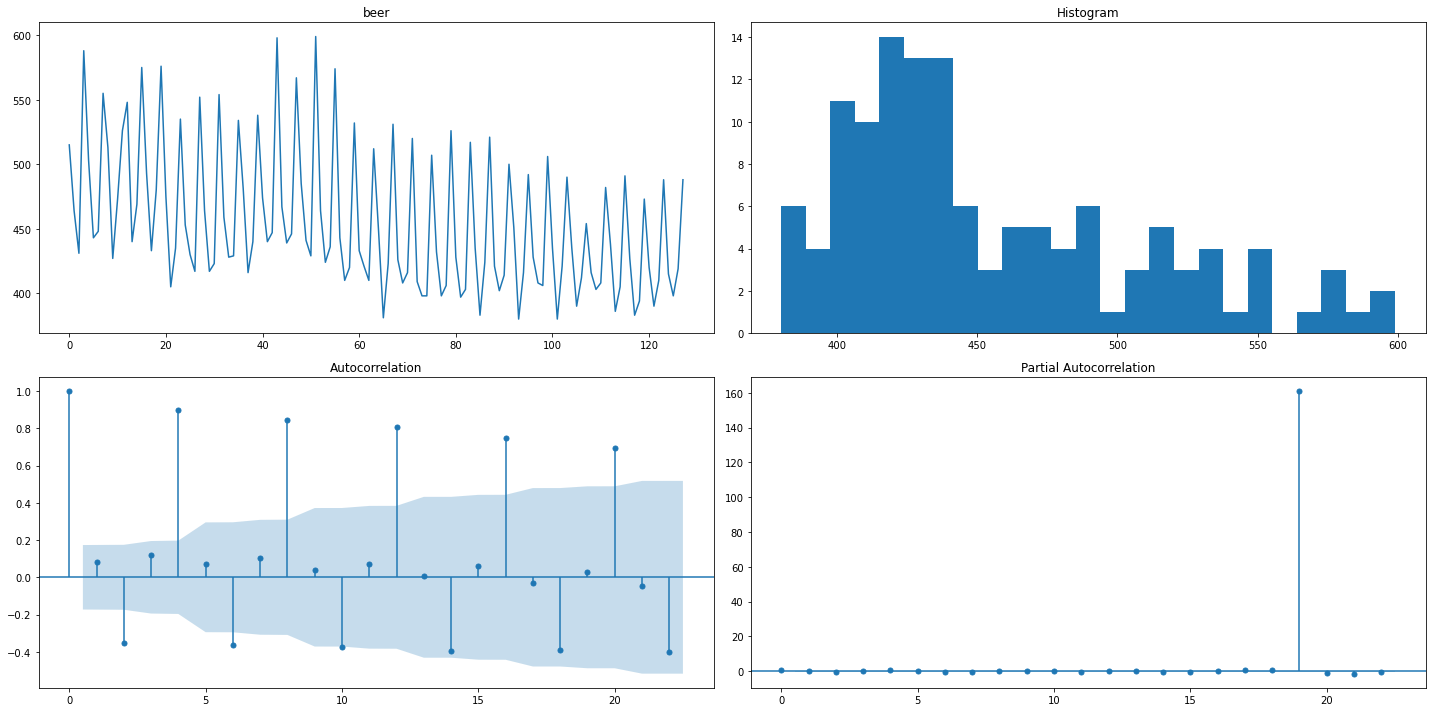

In [431]:
tsplot2(df.beer, "beer")

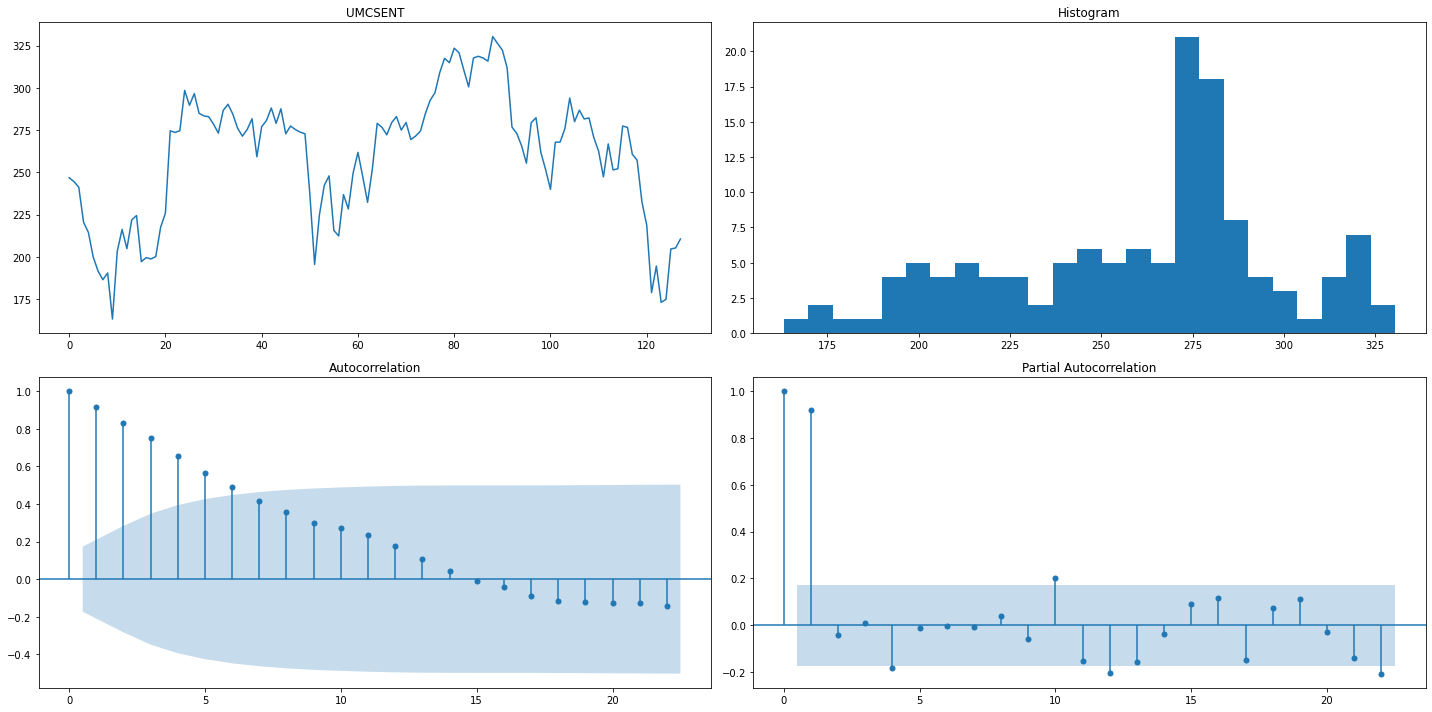

In [432]:
tsplot2(df.umcsent, "UMCSENT")